<a href="https://colab.research.google.com/github/adepril/Analyse-des-lancements-spaciaux/blob/main/LancementsSpaciaux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # Numpy helps us to do complex and high-level mathematical functions on large,
                    # multi-dimentional array and matrices
    
import pandas as pd # Pandas offers us data structures and operations for manipulating numerical 
                    #tables and time series
    
import matplotlib.pyplot as plt # Matplotlib helps us to embed plots into applications, commonly used
                                # for data visualisation
    
import seaborn as sns # Seaborn provides a high-level interface for drawing attractive and informative 
                      # statistical graphics.
import plotly.express as px

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/adepril/datasets/main/space_launches.csv')
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1).reset_index(drop=True)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [3]:
#pour chaque valeur de la colonne "location", découpe la chaine sur la virgule et enlève les espaces
df['Country'] = [str(val).split(',')[-1].lstrip() for val in df.loc[:]['Location']]
# idem # dataset["Country"] = dataset["Location"].apply(lambda location: location.split(", ")[-1]) 
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


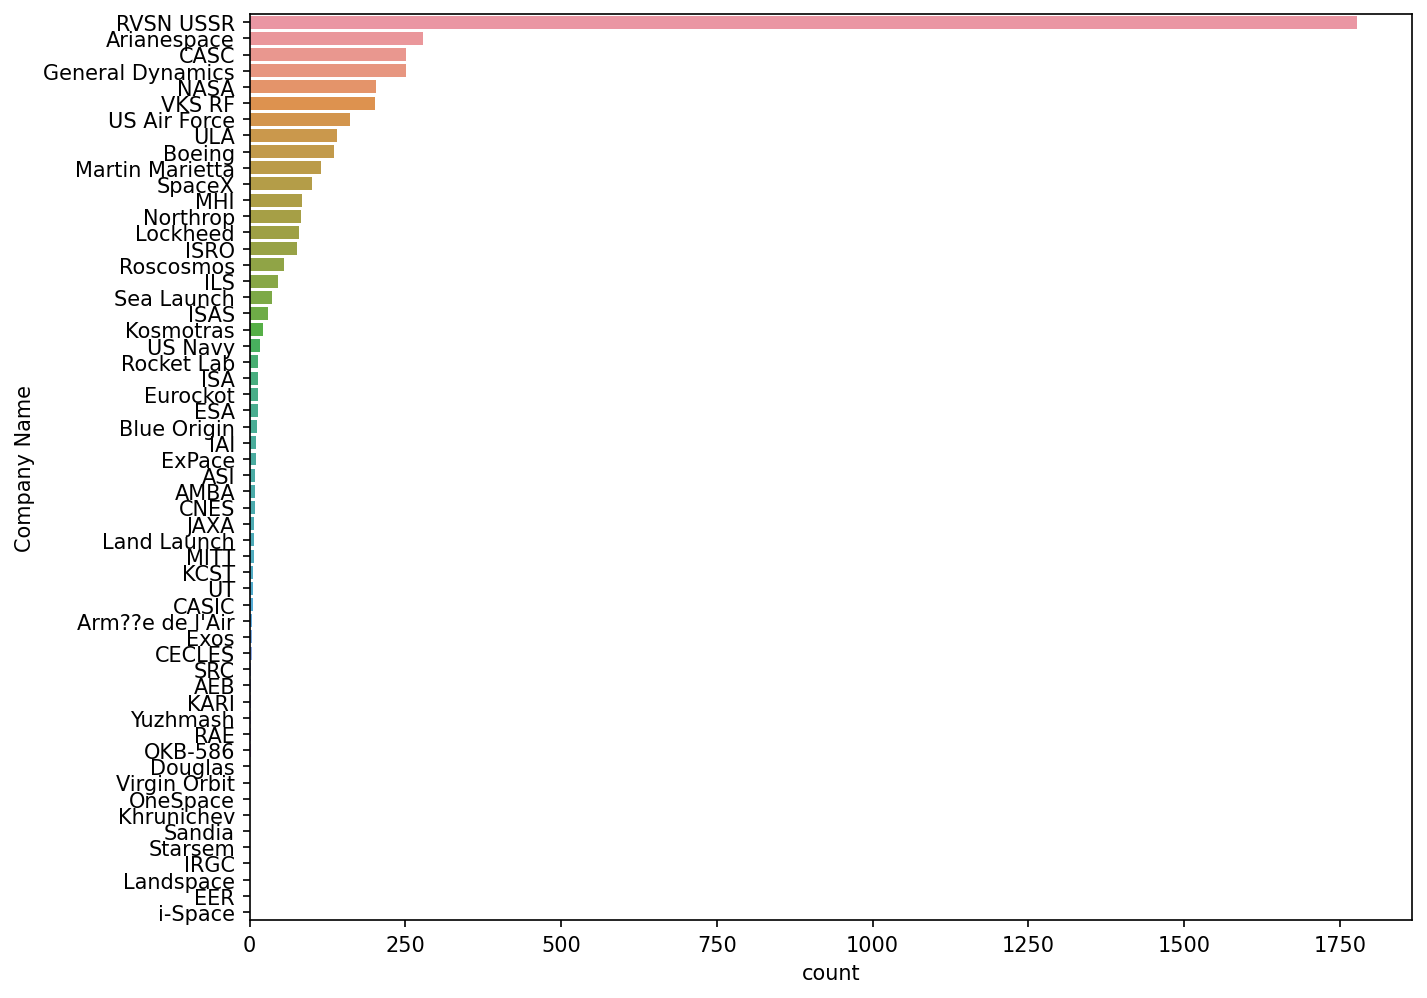

In [4]:
plt.figure(figsize=(10,8),dpi=150)# figsize sets the height and width of the figure.
sns.countplot(y="Company Name", data=df, order=df["Company Name"].value_counts().index)# countplot method is
# used to plot count vs any column in a dataset.order sorts the bar plots by the value provided.

In [5]:
df['Launch_time']=df['Datum'].str.split(" ").str[-2]
df['Launch_date']=df['Datum'].str.split(", ").str[-2]
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Launch_time,Launch_date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,05:12,Fri Aug 07
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,04:01,Thu Aug 06
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,23:57,Tue Aug 04
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,21:25,Thu Jul 30
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,11:50,Thu Jul 30


In [6]:
#creation colonne jour/mois/annee
df['day']=df['Launch_date'].str.split().str[0]
df['month']=df['Launch_date'].str.split().str[1]
df['year']=df['Datum'].str.split(" ").str[-3]
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Launch_time,Launch_date,day,month,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,05:12,Fri Aug 07,Fri,Aug,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,04:01,Thu Aug 06,Thu,Aug,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,23:57,Tue Aug 04,Tue,Aug,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,21:25,Thu Jul 30,Thu,Jul,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,11:50,Thu Jul 30,Thu,Jul,2020


In [7]:
df['Launch_time'].value_counts()
df['time']=df['Launch_time']
df.shape

(4324, 14)

In [8]:
#enlève les lignes dont la colonne time n'a pas le bon format
df = df[df['time'].str.contains(r'(\d\d:\d\d)')]
df.shape
df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.time
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Launch_time,Launch_date,day,month,year,time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,05:12,Fri Aug 07,Fri,Aug,2020,05:12:00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,04:01,Thu Aug 06,Thu,Aug,2020,04:01:00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,23:57,Tue Aug 04,Tue,Aug,2020,23:57:00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,21:25,Thu Jul 30,Thu,Jul,2020,21:25:00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,11:50,Thu Jul 30,Thu,Jul,2020,11:50:00


In [9]:
df['Launch_hour']=pd.to_datetime(df['time'].astype(str)).dt.hour
df['Launch_minute']=pd.to_datetime(df['time'].astype(str)).dt.minute
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Launch_time,Launch_date,day,month,year,time,Launch_hour,Launch_minute
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,05:12,Fri Aug 07,Fri,Aug,2020,05:12:00,5,12
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,04:01,Thu Aug 06,Thu,Aug,2020,04:01:00,4,1
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,23:57,Tue Aug 04,Tue,Aug,2020,23:57:00,23,57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,21:25,Thu Jul 30,Thu,Jul,2020,21:25:00,21,25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,11:50,Thu Jul 30,Thu,Jul,2020,11:50:00,11,50


In [10]:
df['satellite_name']=df['Detail'].str.split('|').str[1]
df['Satellite_name']=df['satellite_name'].str.split('&').str[0]
df = df.drop('satellite_name',axis=1)
df['Launch_system']=df['Detail'].str.split('|').str[0]
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Launch_time,Launch_date,day,month,year,time,Launch_hour,Launch_minute,Satellite_name,Launch_system
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,05:12,Fri Aug 07,Fri,Aug,2020,05:12:00,5,12,Starlink V1 L9,Falcon 9 Block 5
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,04:01,Thu Aug 06,Thu,Aug,2020,04:01:00,4,1,Gaofen-9 04,Long March 2D
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,23:57,Tue Aug 04,Tue,Aug,2020,23:57:00,23,57,150 Meter Hop,Starship Prototype
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,21:25,Thu Jul 30,Thu,Jul,2020,21:25:00,21,25,Ekspress-80,Proton-M/Briz-M
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,11:50,Thu Jul 30,Thu,Jul,2020,11:50:00,11,50,Perseverance,Atlas V 541


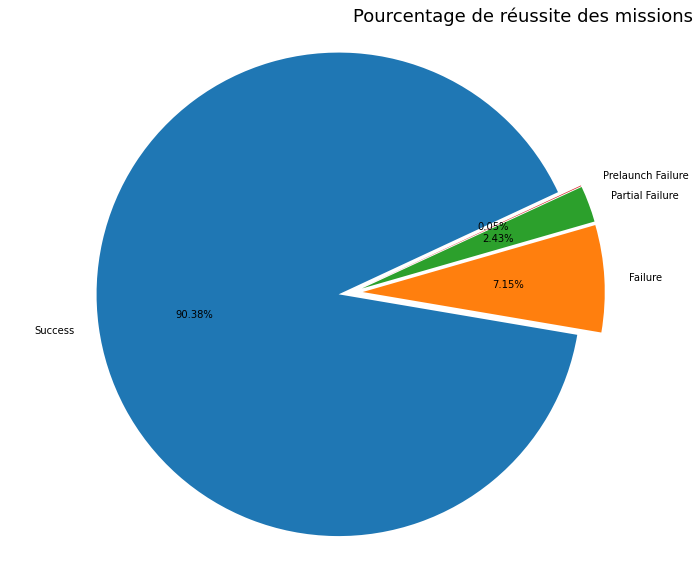

In [11]:
# status of rocket Mission
labels=list(df["Status Mission"].value_counts().keys())
sizes=df["Status Mission"].value_counts()
explode=[]
for i in labels:
    explode.append(0.05)
plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels,explode=explode, autopct='%1.2f%%', startangle=25, shadow=False)
plt.title("Pourcentage de réussite des missions", fontsize=18, loc="right")
plt.axis("equal")
plt.tight_layout()

In [12]:
df["Country"].value_counts()


Russia                       1351
USA                          1321
Kazakhstan                    679
France                        303
China                         264
Japan                         122
India                          75
Pacific Ocean                  32
New Zealand                    13
Kenya                           9
North Korea                     5
Australia                       5
New Mexico                      4
South Korea                     3
Barents Sea                     3
Iran                            2
Israel                          2
Gran Canaria                    2
Shahrud Missile Test Site       1
Yellow Sea                      1
Brazil                          1
Name: Country, dtype: int64


 Top 11 Countries in Satellite Mission:

 Russia           1351
USA              1321
Kazakhstan        679
France            303
China             264
Japan             122
India              75
Pacific Ocean      32
New Zealand        13
Kenya               9
North Korea         5
Name: Country, dtype: int64


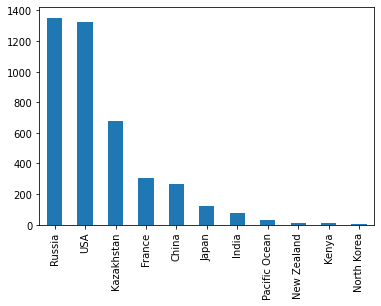

In [13]:
df["Country"].value_counts()[:11].plot.bar()
print("\n Top 11 Countries in Satellite Mission:\n\n", df["Country"].value_counts()[:11])

Top 20 Companies in Satellite Mission: 
 RVSN USSR           1717
Arianespace          279
General Dynamics     249
CASC                 249
NASA                 203
VKS RF               198
US Air Force         157
ULA                  140
Boeing               136
Martin Marietta      108
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  75
Name: Company Name, dtype: int64


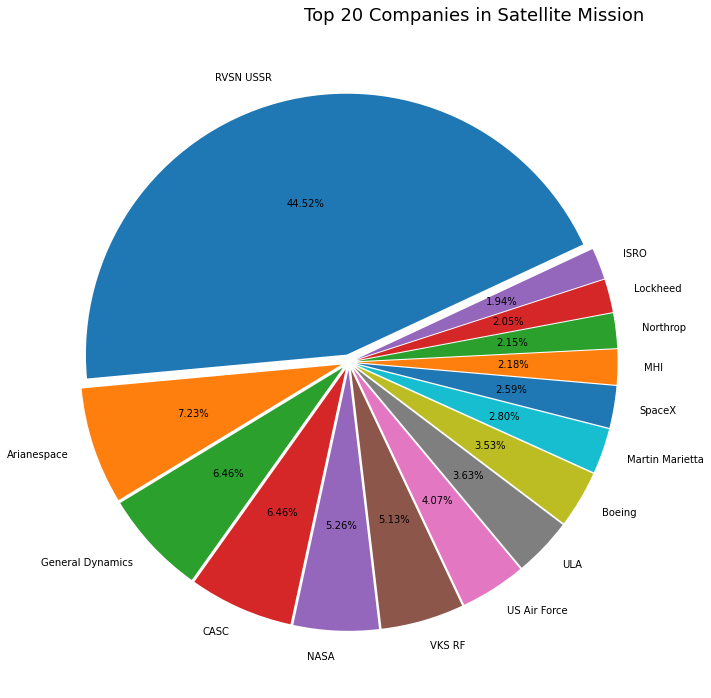

In [14]:
labels=list(df["Company Name"].value_counts()[:15].keys())
sizes=df["Company Name"].value_counts()[:15]
explode=[]
for i in labels:
    explode.append(0.03)
plt.figure(figsize=(10,10))
plt.pie(sizes,labels=labels,explode=explode, autopct='%1.2f%%', startangle=25, shadow=False)
plt.title("Top 20 Companies in Satellite Mission", fontsize=18, loc="right")
plt.axis("equal")
plt.tight_layout()
print("Top 20 Companies in Satellite Mission: \n", format(df["Company Name"].value_counts()[:15]))


In [15]:
#les 20 années où l'on a lancé le plus de satellites
df["year"].value_counts()[:20]

2018    117
1971    116
1975    112
1977    109
1976    109
2019    107
1970    106
1967    102
1969    101
1968    100
1973     99
1966     98
1974     97
1972     96
1978     93
2017     90
2016     88
1965     86
1962     81
1990     76
Name: year, dtype: int64

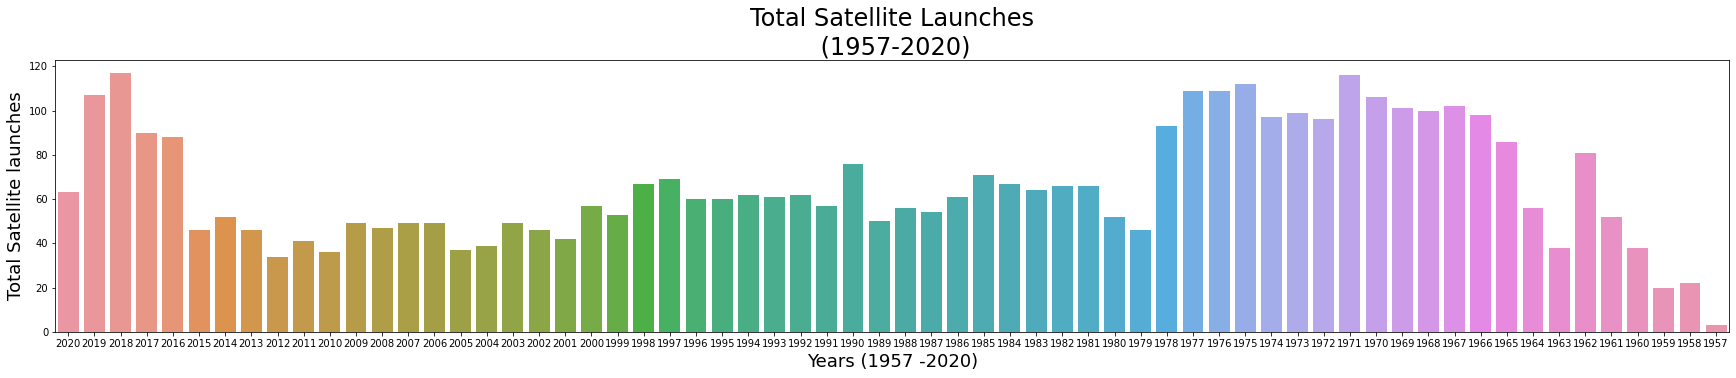

In [16]:
#lancements de satellites par années
plt.figure(figsize=(30,5))
ax=sns.countplot(x="year", data=df)
ax.set_title("Total Satellite Launches\n (1957-2020)", fontsize=24)
ax.set_xlabel("Years (1957 -2020)", fontsize=18)
ax.set_ylabel("Total Satellite launches", fontsize=18)
plt.show()

# Nombre de lancements par compagnies

In [17]:
compagnies = df['Company Name'].value_counts()[:10]
compagnies


RVSN USSR           1717
Arianespace          279
General Dynamics     249
CASC                 249
NASA                 203
VKS RF               198
US Air Force         157
ULA                  140
Boeing               136
Martin Marietta      108
Name: Company Name, dtype: int64

In [18]:
fig = px.bar(df, x=compagnies.index, y=compagnies.values, color=compagnies.values, color_continuous_scale="balance", title="Nombre de lancements des 10 premières compagnies")
fig.update_layout(xaxis_title="Compagnies", yaxis_title="Nombre de lancements")
fig.show()

In [19]:
#liste des couleurs pour le graphe
import plotly.express as px
from textwrap import wrap

named_colorscales = px.colors.named_colorscales()
print("\n".join(wrap("".join('{:<12}'.format(c) for c in named_colorscales), 96)))

aggrnyl     agsunset    blackbody   bluered     blues       blugrn      bluyl       brwnyl
bugn        bupu        burg        burgyl      cividis     darkmint    electric    emrld
gnbu        greens      greys       hot         inferno     jet         magenta     magma
mint        orrd        oranges     oryel       peach       pinkyl      plasma      plotly3
pubu        pubugn      purd        purp        purples     purpor      rainbow     rdbu
rdpu        redor       reds        sunset      sunsetdark  teal        tealgrn     viridis
ylgn        ylgnbu      ylorbr      ylorrd      algae       amp         deep        dense
gray        haline      ice         matter      solar       speed       tempo       thermal
turbid      armyrose    brbg        earth       fall        geyser      prgn        piyg
picnic      portland    puor        rdgy        rdylbu      rdylgn      spectral    tealrose
temps       tropic      balance     curl        delta       edge        hsv         icefire


# Lancements du fusées par pays 
Carte Choropleth

In [20]:
df["Country"] = df.Location.str.split(",").str[-1].str.strip()
df["Country"].value_counts()

Russia                       1351
USA                          1321
Kazakhstan                    679
France                        303
China                         264
Japan                         122
India                          75
Pacific Ocean                  32
New Zealand                    13
Kenya                           9
North Korea                     5
Australia                       5
New Mexico                      4
South Korea                     3
Barents Sea                     3
Iran                            2
Israel                          2
Gran Canaria                    2
Shahrud Missile Test Site       1
Yellow Sea                      1
Brazil                          1
Name: Country, dtype: int64

In [21]:
list_countries = {'Gran Canaria': 'USA', 
                'Barents Sea': 'Russian Federation',
                'Russia': 'Russian Federation',
                'Pacific Missile Range Facility': 'USA', 
                'Shahrud Missile Test Site': 'Iran, Islamic Republic of', 
                'Yellow Sea': 'China', 
                'New Mexico': 'USA',
                'Iran': 'Iran, Islamic Republic of',
                'North Korea': 'Korea, Democratic People\'s Republic of',
                'Pacific Ocean': 'United States Minor Outlying Islands',
                 'South Korea': 'Korea, Republic of'}
for country in list_countries:
    df.Country = df.Country.replace(country, list_countries[country])
df["Country"].value_counts()

Russian Federation                        1354
USA                                       1327
Kazakhstan                                 679
France                                     303
China                                      265
Japan                                      122
India                                       75
United States Minor Outlying Islands        32
New Zealand                                 13
Kenya                                        9
Korea, Democratic People's Republic of       5
Australia                                    5
Iran, Islamic Republic of                    3
Korea, Republic of                           3
Israel                                       2
Brazil                                       1
Name: Country, dtype: int64

In [22]:
!pip install iso3166

In [23]:
from iso3166 import countries

def convert_iso(country):
    return countries.get(country).alpha3
df['ISO'] = df.Country.apply(lambda country: convert_iso(country))
iso = df.ISO.value_counts()
iso

RUS    1354
USA    1327
KAZ     679
FRA     303
CHN     265
JPN     122
IND      75
UMI      32
NZL      13
KEN       9
PRK       5
AUS       5
KOR       3
IRN       3
ISR       2
BRA       1
Name: ISO, dtype: int64

In [24]:
maps = px.choropleth(df, locations=iso.index, color=iso.values, hover_name=iso.index, title='Nombre de lancements', color_continuous_scale="Viridis", width=1000)
maps.show()

# Status des missions

In [25]:
# missions réussies / échouées / partiellement échouées / échouées avant lancement 
mission_status = df["Status Mission"].value_counts()
mission_status

Success              3794
Failure               300
Partial Failure       102
Prelaunch Failure       2
Name: Status Mission, dtype: int64

In [26]:
tx_reussite = px.pie(df, values=mission_status.values, names=["Success", "Failure", "Partial Failure", "Prelaunch Failure"], width=800, title="Taux de réussite des lancements", color_discrete_sequence=["darkblue", "red", "blue", "green"])
tx_reussite.update_traces(textfont_size=10, hoverinfo='label+percent')
tx_reussite.show()

In [27]:
tx_reussite = px.pie(df, values=mission_status.values, names=mission_status.index, title="Taux de réussite des lancements", hole=0.5, color_discrete_sequence=["darkblue", "red", "blue", "green"], width=800)
tx_reussite.update_traces(textfont_size=20, hoverinfo='label+percent')
tx_reussite.show()

In [66]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

labels = ["Success", "Failure", "Partial Failure", "Prelaunch Failure"]
values = mission_status.values
name = "Taux de réussite des lancements"
colors = [ '#00c600', '#66b3ff',"#1f77b4",'#d62728']
'''
data1 = {
   "values": values,
   "labels": labels,
   "domain": {"column": 0},
    "hoverinfo":"label+percent",
       'marker': {
      'colors': [
        'rgb(0, 204, 0)',
        'rgb(255, 255, 0)',
        'rgb(118, 17, 195)',
        'rgb(0, 48, 240)'
      ]
    },
   "type": "pie"
}'''

data1 = {
   "values": values,
   "labels": labels,
   "domain": {"column": 0},
   "type": "pie"
}

data2 = {
   "values": values,
   "labels": labels,
   "domain": {"column": 1},
   "hoverinfo":"label+percent",
   "hole": .5, #épaisseur du trou du disque
   "type": "pie"
}

data = [data1,data2]
layout = go.Layout(
   {
      "title":name,
      "grid": {"rows": 1, "columns": 2},
      "annotations": [
         {
            "font": {
               "size": 20
            },
            "showarrow": False,
            "text": "", #texte affiché au centre du disque
            "x": 0.18, #centre du disque
            "y": 0.5  #centre du disque
         },
         {
            "font": {
               "size": 20
            },
            "showarrow": False,
            "text": "",
            "x": 0.83,
            "y": 0.5
         }
      ]
   }
)

fig = go.Figure(data = data, layout = layout)
fig.update_layout( dict(width=1000) ) #taille de l'ensemble

iplot(fig)


# Coût des missions

In [29]:
df = df.rename(columns={" Rocket": "Price"})
df.shape

(4198, 19)

In [30]:
df = df.dropna()
df.shape

(958, 19)

In [31]:
df.Price = df.Price.astype(str).str.replace(',', '')
df.Price = pd.to_numeric(df.Price)
print(df['Price'])

0        50.00
1        29.75
3        65.00
4       145.00
5        64.68
         ...  
3855     59.00
3971     63.23
3993     63.23
4000     63.23
4020     63.23
Name: Price, Length: 958, dtype: float64


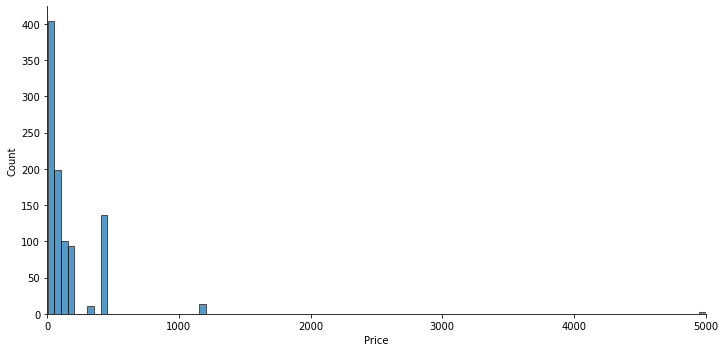

In [32]:
fig = sns.displot(df, x=df.Price, bins=100, aspect=2)
fig.set(xlim=(0,5000))
plt.show()